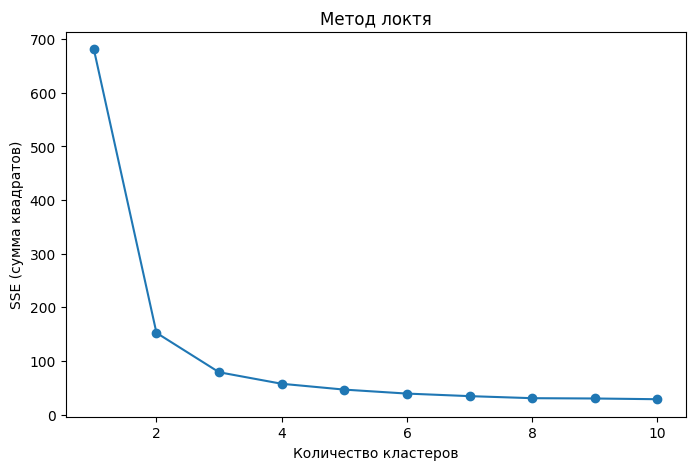

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = load_iris()
X = data.data

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("SSE (сумма квадратов)")
plt.show()

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import imageio.v2 as imageio

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, :2]
scaler = StandardScaler()
X = scaler.fit_transform(X)

def calculate_distances(points, centroids):
    distances = np.linalg.norm(points[:, np.newaxis] - centroids, axis=2)
    return distances

def kmeans_with_visualization(X, k, max_iters=100, gif_path='kmeans_steps.gif'):
    random_indices = random.sample(range(len(X)), k)
    centroids = X[random_indices]
    prev_centroids = centroids + 10
    clusters = np.zeros(len(X))
    iteration = 0
    images = []

    while iteration < max_iters and not np.allclose(centroids, prev_centroids):
        iteration += 1
        prev_centroids = centroids.copy()

        distances = calculate_distances(X, centroids)
        clusters = np.argmin(distances, axis=1)

        for i in range(k):
            if np.any(clusters == i):
                centroids[i] = X[clusters == i].mean(axis=0)

        plt.figure(figsize=(8, 6))
        for i in range(k):
            plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f"Кластер {i+1}")
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Центроиды')
        plt.title(f"Итерация {iteration}")
        plt.xlabel("Признак 1")
        plt.ylabel("Признак 2")
        plt.legend()
        plt.grid()

        filename = f'kmeans_step_{iteration}.png'
        plt.savefig(filename)
        images.append(filename)
        plt.close()

    # Создание GIF из сохранённых изображений
    with imageio.get_writer(gif_path, mode='I', duration=0.8) as writer:
        for image in images:
            writer.append_data(imageio.imread(image))

    print(f"GIF-анимация сохранена в файл: {gif_path}")
    return clusters, centroids

k = 3
gif_path = 'kmeans_steps.gif'

clusters, centroids = kmeans_with_visualization(X, k, gif_path=gif_path)


GIF-анимация сохранена в файл: kmeans_steps.gif
